In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action="ignore")

pd.options.display.max_rows = 8

In [2]:
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Create a DataFrame
iris_dataset = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the target column
iris_dataset['target'] = iris.target

# Map target values to target names
target_names = iris.target_names
iris_dataset['Species'] = iris_dataset['target'].map({i: name for i, name in enumerate(target_names)})

iris_dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
...,...,...,...,...,...,...
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica
149,5.9,3.0,5.1,1.8,2,virginica


In [3]:
iris_dataset.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Species
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica
149,5.9,3.0,5.1,1.8,2,virginica


In [4]:
iris_dataset.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [5]:
iris_dataset.Species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

In [6]:
iris_dataset[iris_dataset.Species == 'setosa']

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
...,...,...,...,...,...,...
46,5.1,3.8,1.6,0.2,0,setosa
47,4.6,3.2,1.4,0.2,0,setosa
48,5.3,3.7,1.5,0.2,0,setosa
49,5.0,3.3,1.4,0.2,0,setosa


In [7]:
iris_dataset.loc[1:3]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Species
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa


In [8]:
# drop the fifth column

iris_dataset = iris_dataset.drop(columns=iris_dataset.columns[4])
# display first 5 rows
iris_dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
# Show descriptive statistics for the sepal length feature
iris_dataset[['sepal length (cm)']].describe()

,sepal length (cm)
count,150.000000
mean,5.843333
std,0.828066
min,4.300000
25%,5.100000
50%,5.800000
75%,6.400000
max,7.900000


In [10]:
# Show concise summary of DataFrame
iris_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
#Size of the dataset
iris_dataset.shape

(150, 5)

In [12]:
# How many of each species do we have?
iris_dataset[['Species']].value_counts(normalize=False)

Species   
setosa        50
versicolor    50
virginica     50
dtype: int64

In [13]:
# Group-level aggregation

iris_dataset.groupby('Species')[['petal length (cm)']].describe()

iris_dataset.groupby('Species')[['petal length (cm)']].mean().sort_values(by="petal length (cm)",  ascending=True)

iris_dataset.groupby('Species')[['petal length (cm)']].agg(["count", "mean", "median", "min", "max"])

petal length (cm)                        
                       count   mean median  min  max
Species                                             
setosa                    50  1.462   1.50  1.0  1.9
versicolor                50  4.260   4.35  3.0  5.1
virginica                 50  5.552   5.55  4.5  6.9

<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>

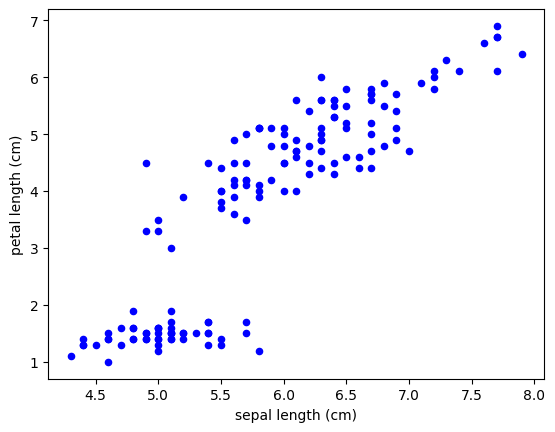

In [14]:
# Relationship visualization
iris_dataset.plot(kind='scatter', x='sepal length (cm)', y='petal length (cm)', color='b')

Text(0.5, 0, 'Sepal Width (cm)')

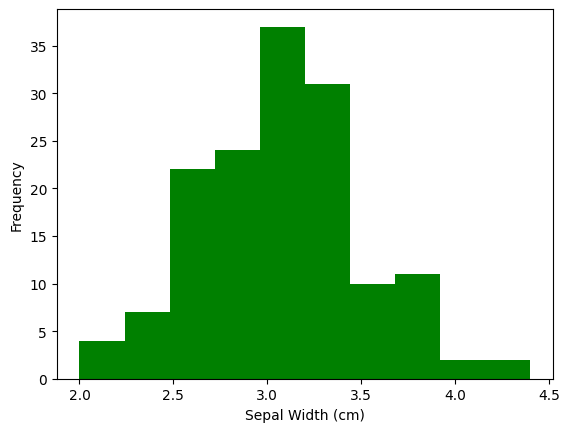

In [15]:
# Distribution visualization

iris_dataset['sepal width (cm)'].plot(kind='hist', color='g')
plt.xlabel('Sepal Width (cm)')

<Axes: xlabel='sepal length (cm)'>

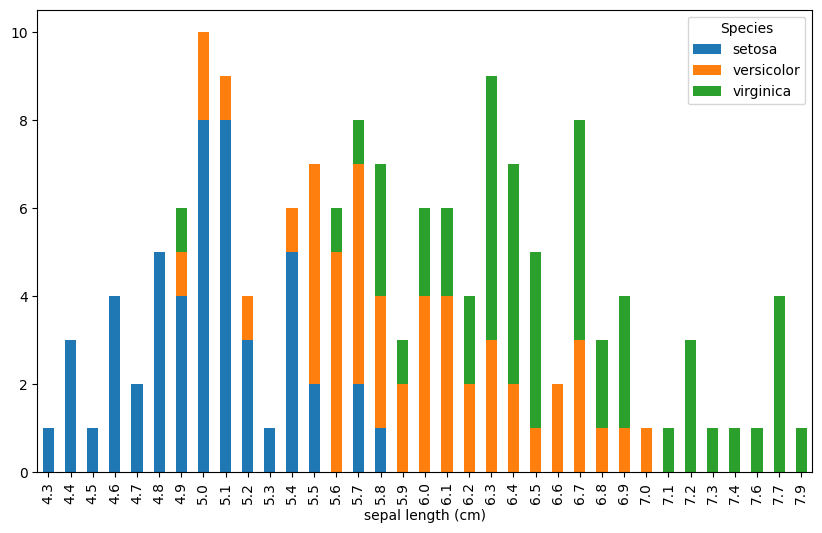

In [16]:
%matplotlib inline
iris_dataset.groupby('sepal length (cm)')['Species'].value_counts().unstack().plot(kind="bar", stacked=True, figsize=(10,6))

In [17]:
from sklearn.model_selection import train_test_split

# Separate dataset into training data and test data

response = 'Species'

predictors = list(iris_dataset.columns)
predictors.remove(response)


# Create feature matrix (X) and response vector (y)
X = iris_dataset[predictors]
y = iris_dataset[response]


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                    test_size = 0.25,
                                    random_state=0)

# Print shapes of X_test and y_train to verify
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}\n')

X_test.info()

X_test shape: (38, 4)
y_train shape: (112,)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 114 to 83
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  38 non-null     float64
 1   sepal width (cm)   38 non-null     float64
 2   petal length (cm)  38 non-null     float64
 3   petal width (cm)   38 non-null     float64
dtypes: float64(4)
memory usage: 1.5 KB


Text(0.5, 0.92, 'Pair Plot of Iris Dataset with Species Coloring')

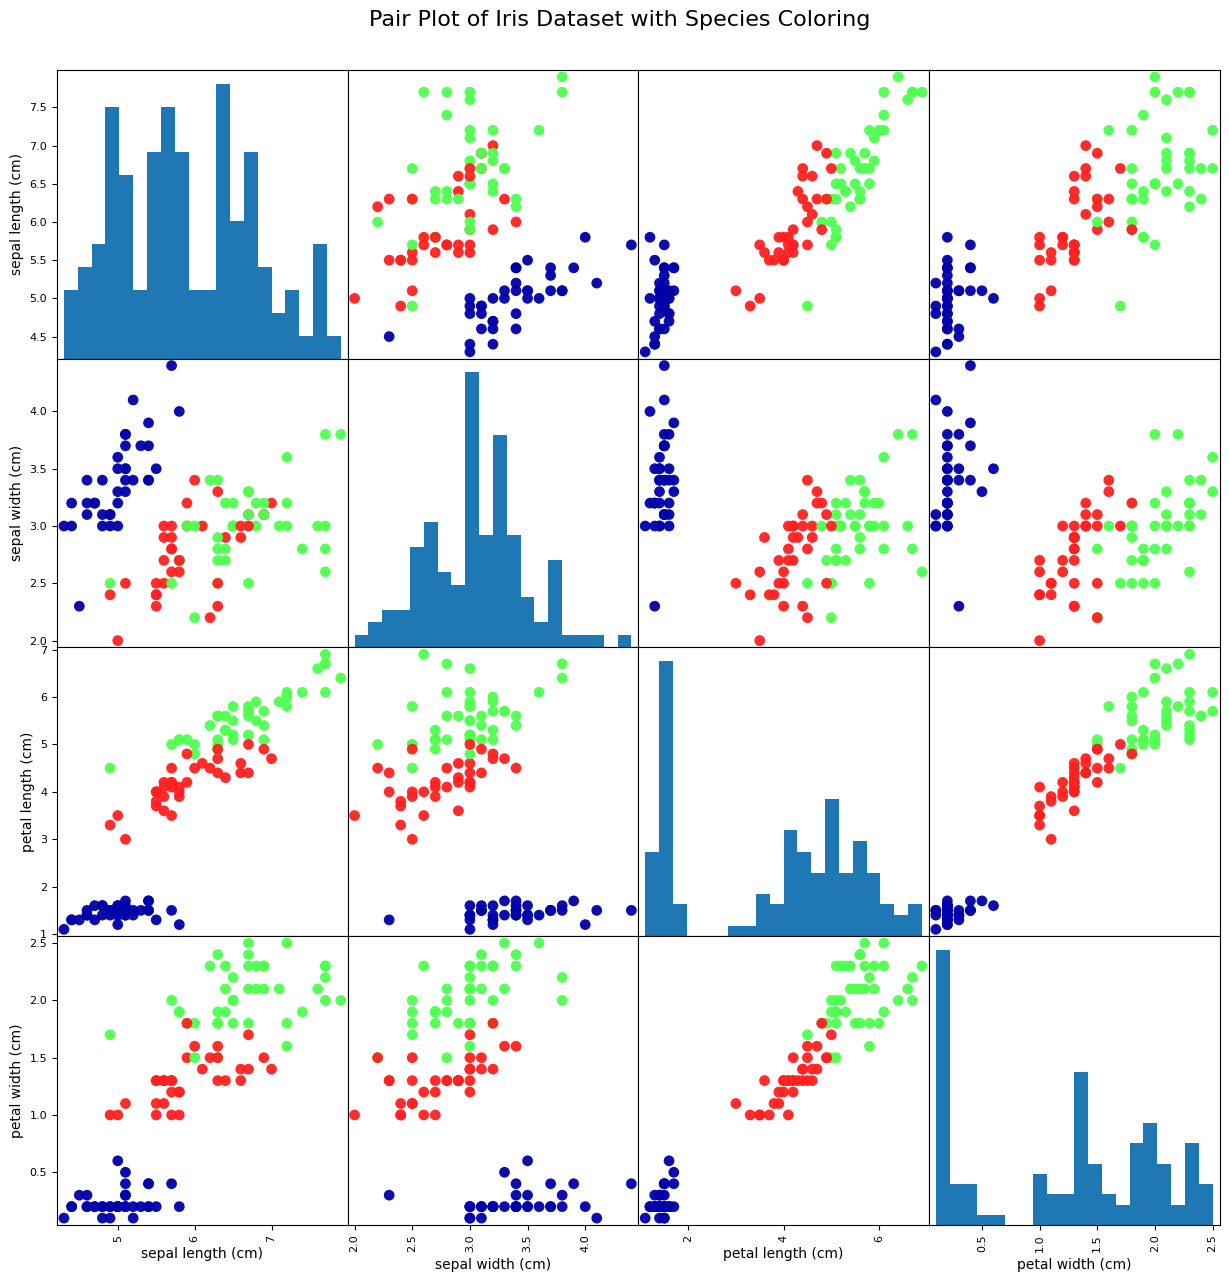

In [18]:
from sklearn.preprocessing import LabelEncoder
import mglearn

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the categorical values in 'Species' column
y_train_encoded = label_encoder.fit_transform(y_train)

# Create DataFrame from data in X_train
iris_df = pd.DataFrame(X_train, columns=predictors)

# Create a scatter matrix from the dataframe
grr = pd.plotting.scatter_matrix(iris_df, figsize=(15, 15), marker='o',
                                 hist_kwds={'bins': 20}, s=60, alpha=.95,
                                 cmap=mglearn.cm3, c=y_train_encoded)

# Add title to the scatter matrix
plt.suptitle("Pair Plot of Iris Dataset with Species Coloring", fontsize=16, y=0.92)

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)     # Set k = 1

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [20]:
# Make a prediction on new instances

X_new = np.array([[5, 2.9, 1, 0.2],
                  [4, 3.5, 6, 0.8],
                  [5.7,	2.9, 4.2, 1.3],
                  [0, 0, 0, 0]])

prediction = knn.predict(X_new)

print(f"Predictions: {prediction}\n")

Predictions: ['setosa' 'virginica' 'versicolor' 'setosa']



In [21]:
# Model evaluation

y_pred = knn.predict(X_test)
print(f'Test set predictions:\n {y_pred}\n')

print(f'Test set score: {np.mean(y_pred == y_test):.2f}')


Test set predictions:
 ['virginica' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica'
 'setosa' 'versicolor' 'versicolor' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'setosa' 'versicolor' 'versicolor'
 'setosa' 'setosa' 'virginica' 'versicolor' 'setosa' 'setosa' 'virginica'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'setosa' 'virginica'
 'versicolor' 'setosa' 'virginica' 'virginica' 'versicolor' 'setosa'
 'virginica']

Test set score: 0.97


In [22]:
# Alternative way of calculating test score
print(f'Test set score: {knn.score(X_test, y_test):.2f}')

Test set score: 0.97
